<a href="https://colab.research.google.com/github/lupiel/kaggle-titanic-ml/blob/main/ml-notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/lupiel/kaggle-titanic-ml/blob/main/ml-notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

In [2]:
import sys

assert sys.version_info >= (3, 7)

In [3]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [19]:
from pathlib import Path
import pandas as pd

data_root = "https://github.com/lupiel/kaggle-titanic-ml/raw/main/"

train = pd.read_csv(data_root + "data/train.csv")
test = pd.read_csv(data_root + "data/test.csv")

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


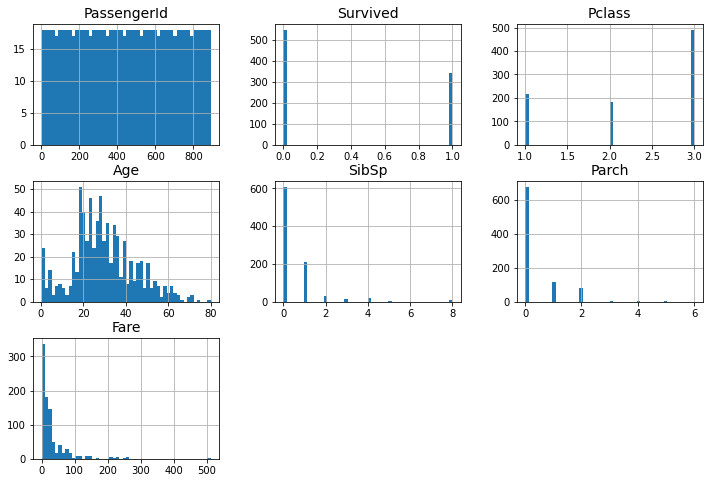

In [23]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

train.hist(bins=50, figsize=(12, 8))
plt.show()

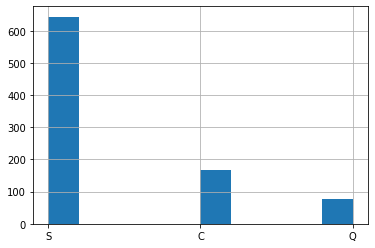

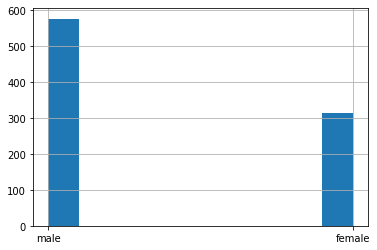

In [24]:
train["Embarked"].hist()
plt.show()
train["Sex"].hist()
plt.show()

In [25]:
corr_matrix = train.corr()
corr_matrix["Survived"].sort_values(ascending=False)

# Can spot a direct correlation of Survived with Pclass and Fare

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [26]:
import numpy as np
# To ensure that this notebook's outputs remain the same every time we run it, we need to set the random seed:
np.random.seed(42)

## Experimenting with attribute combinations

In [27]:
def is_man_with_parents_children(parch, sex):
    if parch > 0 and sex == "male":
        return True
    else:
        return False

train["ManWithParch"] = train.apply(lambda x: is_man_with_parents_children(x.Parch, x.Sex), axis=1)
train.head(10).tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ManWithParch
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,False
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,False
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,True
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,False
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,False


## Prepare the Data for Machine Learning Alborithms

In [28]:
X = train.drop(columns=["Ticket", "Cabin", "Name", "PassengerId"])
y = train["Survived"]
X.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,ManWithParch
0,0,3,male,22.0,1,0,7.2500,S,False
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,False
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,False


In [29]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [30]:
mean_age = X["Age"].mean()

X["Age"].fillna(mean_age, inplace=True)

In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Sex           891 non-null    object 
 3   Age           891 non-null    float64
 4   SibSp         891 non-null    int64  
 5   Parch         891 non-null    int64  
 6   Fare          891 non-null    float64
 7   Embarked      889 non-null    object 
 8   ManWithParch  891 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 56.7+ KB


In [32]:
null_rows_idx = X.isnull().any(axis=1)
X.loc[null_rows_idx].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,ManWithParch
61,1,1,female,38.0,0,0,80.0,NaN,False
829,1,1,female,62.0,0,0,80.0,NaN,False


In [33]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_categ_column(df, col):

    col_cat = df[[col]]
    cat_encoder = OneHotEncoder(sparse=False)
    col_cat_1hot = cat_encoder.fit(col_cat)
    df_output = pd.DataFrame(
        cat_encoder.transform(col_cat),
        columns=cat_encoder.get_feature_names_out(),
        index=df[col].index
    )
    return df_output


In [34]:
pd.concat([one_hot_categ_column(X, "Sex"), X], axis=1)

,Sex_female,Sex_male,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,ManWithParch
0,0.0,1.0,0,3,male,22.000000,1,0,7.2500,S,False
1,1.0,0.0,1,1,female,38.000000,1,0,71.2833,C,False
2,1.0,0.0,1,3,female,26.000000,0,0,7.9250,S,False
3,1.0,0.0,1,1,female,35.000000,1,0,53.1000,S,False
4,0.0,1.0,0,3,male,35.000000,0,0,8.0500,S,False
...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0,2,male,27.000000,0,0,13.0000,S,False
887,1.0,0.0,1,1,female,19.000000,0,0,30.0000,S,False
888,1.0,0.0,0,3,female,29.699118,1,2,23.4500,S,False
889,0.0,1.0,1,1,male,26.000000,0,0,30.0000,C,False


In [35]:
pd.concat([one_hot_categ_column(X, "Embarked"), X], axis=1)

,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,ManWithParch
0,0.0,0.0,1.0,0.0,0,3,male,22.000000,1,0,7.2500,S,False
1,1.0,0.0,0.0,0.0,1,1,female,38.000000,1,0,71.2833,C,False
2,0.0,0.0,1.0,0.0,1,3,female,26.000000,0,0,7.9250,S,False
3,0.0,0.0,1.0,0.0,1,1,female,35.000000,1,0,53.1000,S,False
4,0.0,0.0,1.0,0.0,0,3,male,35.000000,0,0,8.0500,S,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.0,1.0,0.0,0,2,male,27.000000,0,0,13.0000,S,False
887,0.0,0.0,1.0,0.0,1,1,female,19.000000,0,0,30.0000,S,False
888,0.0,0.0,1.0,0.0,0,3,female,29.699118,1,2,23.4500,S,False
889,1.0,0.0,0.0,0.0,1,1,male,26.000000,0,0,30.0000,C,False
